In [1]:
from collections import defaultdict
import heapq
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# sample graph implemented as a dictionary
graph = {'LAX': ['SFO', 'SEA', 'CHI','NYC','MIA'],
         'SFO': ['SEA','ATL','CHI','NYC','MIA','PHO'],
         'SEA': ['ATL', 'CHI','SFO','NYC'],
         'CHI': ['NYC','MIA','LAX'],
         'NYC': ['MIA', 'PHO','LAX','SFO','SEA','ATL'],
         'ATL': ['NYC','PHO'],
         'MIA': ['PHO','NYC'],
         'PHO': ['MIA']

}


In [3]:
def bfs_shortest_path(graph, start, goal):
    # temporarily storing explored nodes
    explored = []
    # all the paths we will have to check
    search = [[start]]
 
    # If we are already at the destination
    if start == goal:
        return "You are already at the destination"
 
    # loops over all possible nodes
    while search:
        # we take out the first searched node
        path = search.pop(0)
        # the last node is taken
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            # BFS approach implemented here, going through all neighbors to search
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                search.append(new_path)
                
                # if we find our destination we return it
                if neighbour == goal:
                    return new_path
 
            # mark node as explored
            explored.append(node)
 
    # in case there's no path between the 2 nodes
    return "Destination is not reachable"
 
bfs_shortest_path(graph, 'CHI', 'MIA')

['CHI', 'MIA']

In [4]:
flights = {
    
'LAX':{'SFO':3, 'SEA': 6,'CHI':10},
'SFO':{'SEA':2, 'ATL':7},
'SEA':{'ATL':10, 'CHI':5},
'CHI':{'NYC':4,'MIA':3},
'NYC':{'MIA':3,'PHO':2},
'ATL':{'NYC':2,'PHO':5},
'MIA':{'PHO':4},
'PHO':{'MIA':4}
    
}

In [5]:
flights = {
    
'LAX':{'SFO':3, 'SEA': 4,'CHI':10, 'NYC':6, 'MIA':5},
'SFO':{'SEA':2, 'ATL':7, 'CHI':8, 'NYC':6, 'MIA':4, 'PHO':3},
'SEA':{'ATL':10, 'CHI':5, 'SFO':4, 'NYC':6},
'CHI':{'NYC':4,'MIA':9, 'LAX':2},
'NYC':{'MIA':3,'PHO':2, 'LAX':5, 'SFO':4, 'SEA':5, 'ATL':2},
'ATL':{'NYC':2,'PHO':5},
'MIA':{'PHO':8, 'NYC':4},
'PHO':{'MIA':9}
    
}

def dijkstra(flights, start, destination):
    
    #initialize our required parameters
    cheapest_flight = {}
    previous_flight = {}
    unseenNodes = flights
    infinity = float('inf')
    track_path = []
    
    # we create sentinels to ensure we are always looking for shorter total paths
    for node in unseenNodes:
        cheapest_flight[node] = infinity
        
    # distance or price at destination will be 0    
    cheapest_flight[start] = 0
    
    # scanning through possible locations
    while unseenNodes:
        
        
        min_price_node = None
        
        for node in unseenNodes:
            
            # verifying condition & then selecting a possibility
            if min_price_node is None:
                min_price_node = node
                
            # we swap the cheapest flight for whichever is closer    
            elif cheapest_flight[node] < cheapest_flight[min_price_node]:
                min_price_node = node
            
        #this opens up all possibilities    
        path_options = flights[min_price_node].items()
        
        # now we will use possible destinations and the price it takes to get to them
        for child_node, price in path_options:
            
            # comparisons to check the cheapest route
            if price + cheapest_flight[min_price_node] < cheapest_flight[child_node]:
                cheapest_flight[child_node] = price+cheapest_flight[min_price_node]
                previous_flight[child_node] = min_price_node
                
        unseenNodes.pop(min_price_node)

    # what to do once we have the final spot
    currentNode = destination
    while currentNode != start:
        try:
            track_path.insert(0, currentNode)
            currentNode = previous_flight[currentNode]
            
        # In some cases, some cities will not be interconnected depending on our input
        except KeyError:
            print("Destination is not reachable")
            break
            
        
    track_path.insert(0,start)
    
    # otherwise, we print out the cheapest flight combo and cities we must go through
    if cheapest_flight[destination] != infinity:
        print("Best Flight Available has a price rating of " + str(cheapest_flight[destination]))
        print("Optimal path is" + str(track_path))
        
dijkstra(flights, "CHI", "PHO")

Best Flight Available has a price rating of 6
Optimal path is['CHI', 'NYC', 'PHO']


Nodes of graph: 
['a', 'b', 'c', 1, 2, 'd', 'e']
Edges of graph: 
[('a', 'b'), (1, 2), ('d', 'e')]


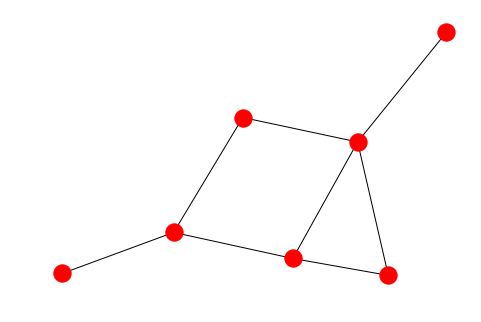

In [6]:
import networkx as nx

G=nx.Graph()
G.add_node("a")
G.add_nodes_from(["b","c"])

G.add_edge(1,2)
edge = ("d", "e")
G.add_edge(*edge)
edge = ("a", "b")
G.add_edge(*edge)

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes_of_graph:  ['a', 1, 'c', 'b', 'e', 'd', 2]
Edges_of_graph: [('a', 'b'), (1, 2), ('e', 'd')]

# adding a list of edges:
G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

nx.draw(G)
plt.show() # display

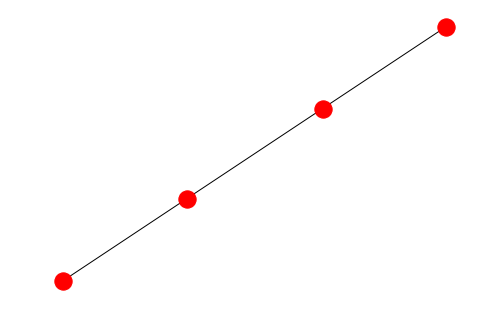

In [7]:
G=nx.path_graph(4)


nx.draw(G)

plt.show()

In [9]:
def create_mst(graph, start):
    mst = defaultdict(set)
    visited = set([start])
    edges = [
        (weight, start, to)
        for to, weight in graph[start].items()
    ]
    heapq.heapify(edges)

    while edges:
        weight, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst[frm].add(to)
            for adjacent, weight in graph[to].items():
                if adjacent not in visited:
                    heapq.heappush(edges, (weight, to, adjacent))

    return mst

flights = {
    'LAX':{'SFO':3, 'SEA': 4,'CHI':10, 'NYC':6, 'MIA':5},
'SFO':{'SEA':2, 'ATL':7, 'CHI':8, 'NYC':6, 'MIA':4, 'PHO':3},
'SEA':{'ATL':10, 'CHI':5, 'SFO':4, 'NYC':6},
'CHI':{'NYC':4,'MIA':3, 'LAX':6},
'NYC':{'MIA':3,'PHO':2, 'LAX':5, 'SFO':4, 'SEA':5, 'ATL':2},
'ATL':{'NYC':2,'PHO':5},
'MIA':{'PHO':8, 'NYC':4},
'PHO':{'MIA':9}
    
}

dict(create_mst(flights, 'PHO'))

{'PHO': {'MIA'},
 'MIA': {'NYC'},
 'NYC': {'ATL', 'LAX', 'SFO'},
 'SFO': {'SEA'},
 'SEA': {'CHI'}}